<a href="https://colab.research.google.com/github/Hama1L/Data_Science/blob/main/Lab_3_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('task3_dataset.csv')
df_column=df.columns[df.columns.duplicated()]
print(list(df_column))
df.head()

[]


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Snoring.1,Level
0,0,P1,33,1,2,4,5.0,4,3.0,2,...,Yes,2.0,2.0,3,1.0,2,3,4,4,Low
1,1,P10,17,1,3,1,5.0,3,4.0,2,...,Yes,7.0,8.0,6,2.0,1,7,2,2,Medium
2,2,P100,35,1,4,5,6.0,5,5.0,4,...,Yes,9.0,2.0,1,4.0,6,7,2,2,High
3,3,P1000,37,1,7,7,7.0,7,6.0,7,...,Yes,3.0,1.0,4,5.0,6,7,5,5,High
4,4,P101,46,1,6,8,7.0,7,7.0,6,...,Yes,4.0,1.0,4,2.0,4,2,3,3,High


In [ ]:

print(f"Number of Rows and Columns",df.shape)
print(df.dtypes)



Number of Rows and Columns (1005, 27)
index                         int64
Patient Id                   object
Age                           int64
Gender                        int64
Air Pollution                 int64
Alcohol use                   int64
Dust Allergy                float64
OccuPational Hazards          int64
Genetic Risk                float64
chronic Lung Disease         object
Balanced Diet               float64
Obesity                     float64
Smoking                     float64
Passive Smoker              float64
Chest Pain                  float64
Coughing of Blood           float64
Fatigue                     float64
Weight Loss                  object
Shortness of Breath         float64
Wheezing                    float64
Swallowing Difficulty         int64
Clubbing of Finger Nails    float64
Frequent Cold                 int64
Dry Cough                     int64
Snoring                       int64
Snoring.1                     int64
Level                     

In [ ]:
df.nunique()


,0
index,1000
Patient Id,1000
Age,40
Gender,2
Air Pollution,8
Alcohol use,8
Dust Allergy,8
OccuPational Hazards,8
Genetic Risk,7
chronic Lung Disease,8


In [ ]:
from sklearn.preprocessing import LabelEncoder

# label encoding for converting object data type to float
label_encoder = LabelEncoder()
df['Patient Id'] = label_encoder.fit_transform(df['Patient Id'])
df['chronic Lung Disease'] = label_encoder.fit_transform(df['chronic Lung Disease'])
df['Level'] = label_encoder.fit_transform(df['Level'])
df['Weight Loss'] = label_encoder.fit_transform(df['Weight Loss'])


# corr_Air_Pollution=df['Air Pollution'].corr(df['Level'])
# print(corr_Air_Pollution)

# corr_Fatigue=df['Fatigue'].corr(df['Level'])
# print(corr_Fatigue)

print(df.corr())

                             index  Patient Id       Age    Gender  \
index                     1.000000    1.000000  0.002100 -0.025518   
Patient Id                1.000000    1.000000  0.002100 -0.025518   
Age                       0.002100    0.002100  1.000000 -0.203045   
Gender                   -0.025518   -0.025518 -0.203045  1.000000   
Air Pollution             0.064851    0.064851  0.098026 -0.244553   
Alcohol use               0.048175    0.048175  0.150213 -0.226287   
Dust Allergy              0.042941    0.042941  0.034408 -0.201982   
OccuPational Hazards      0.039088    0.039088  0.060726 -0.190710   
Genetic Risk              0.038616    0.038616  0.072302 -0.221098   
chronic Lung Disease      0.028950    0.028950  0.129531 -0.199900   
Balanced Diet             0.037128    0.037128  0.004061 -0.097214   
Obesity                   0.059081    0.059081  0.033685 -0.122369   
Smoking                   0.027280    0.027280  0.073906 -0.202609   
Passive Smoker      

In [ ]:
import pandas as pd
import numpy as np

print("\nMissing values per column:\n", df.isnull().sum())


numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)



categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after imputation:\n", df.isnull().sum())


df.nunique()




Missing values per column:
 index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                1
OccuPational Hazards        0
Genetic Risk                1
chronic Lung Disease        0
Balanced Diet               1
Obesity                     1
Smoking                     2
Passive Smoker              1
Chest Pain                  1
Coughing of Blood           1
Fatigue                     3
Weight Loss                 0
Shortness of Breath         1
Wheezing                    1
Swallowing Difficulty       0
Clubbing of Finger Nails    2
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Snoring.1                   0
Level                       0
dtype: int64

Missing values after imputation:
 index                       0
Patient Id                  0
Age                         0
Gender                 

<ipython-input-43-cb1f7bc78d2a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,0
index,1000
Patient Id,1000
Age,40
Gender,2
Air Pollution,8
Alcohol use,8
Dust Allergy,9
OccuPational Hazards,8
Genetic Risk,8
chronic Lung Disease,8


In [ ]:

unique_cat = df['Level'].unique()
print("Unique categories in 'Level':", unique_cat)


Unique categories in 'Level': [1 2 0]



Class distribution for 'Level':
 Alcohol use
2    202
8    189
7    170
1    152
5     91
3     80
6     80
4     41
Name: count, dtype: int64

Class proportions for 'Alchol':
 Alcohol use
2    0.200995
8    0.188060
7    0.169154
1    0.151244
5    0.090547
3    0.079602
6    0.079602
4    0.040796
Name: count, dtype: float64

The dataset is balanced.


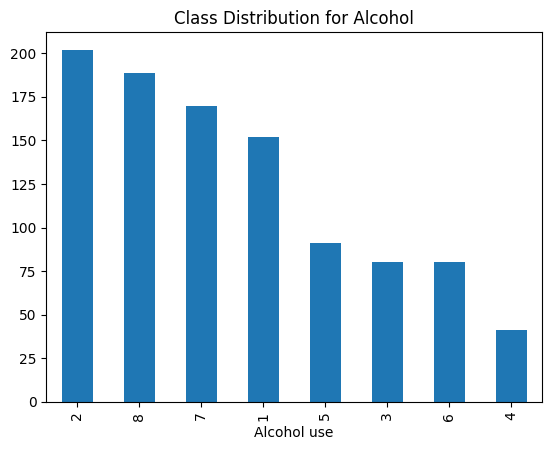

In [ ]:

alcohol_count=df['Alcohol use'].value_counts()
print("\nClass distribution for 'Level':\n", alcohol_count)


level_proportions = alcohol_count / len(df)
print("\nClass proportions for 'Alchol':\n", level_proportions)


imbalance_threshold = 0.8

alcohol_count.plot(kind='bar', title='Class Distribution for Alcohol')

if level_proportions.max() >= imbalance_threshold :
    print("\nThe dataset is imbalanced.")
else:
    print("\nThe dataset is balanced.")




In [ ]:
#8
from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()
df['Patient Id'] = label_encoder.fit_transform(df['Patient Id'])
df['chronic Lung Disease'] = label_encoder.fit_transform(df['chronic Lung Disease'])
df['Level'] = label_encoder.fit_transform(df['Level'])
df['Weight Loss'] = label_encoder.fit_transform(df['Weight Loss'])

print(df['Patient Id'])
print(df['chronic Lung Disease'])
print(df['Level'])
print(df['Weight Loss'])

0         0
1         1
2         2
3         3
4         4
       ... 
1000    990
1001    991
1002    992
1003    993
1004    994
Name: Patient Id, Length: 1005, dtype: int64
0       1
1       1
2       3
3       6
4       5
       ..
1000    3
1001    5
1002    5
1003    6
1004    6
Name: chronic Lung Disease, Length: 1005, dtype: int64
0       1
1       2
2       0
3       0
4       0
       ..
1000    0
1001    0
1002    0
1003    0
1004    0
Name: Level, Length: 1005, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
1000    0
1001    0
1002    1
1003    1
1004    0
Name: Weight Loss, Length: 1005, dtype: int64


In [ ]:
#9
corr_Air_Pollution=df['Air Pollution'].corr(df['Level'])
print(corr_Air_Pollution)

corr_Fatigue=df['Fatigue'].corr(df['Level'])
print(corr_Fatigue)

print(df.corr())

-0.5804722212967888
-0.40236852387906763
                             index  Patient Id       Age    Gender  \
index                     1.000000    1.000000  0.002100 -0.025518   
Patient Id                1.000000    1.000000  0.002100 -0.025518   
Age                       0.002100    0.002100  1.000000 -0.203045   
Gender                   -0.025518   -0.025518 -0.203045  1.000000   
Air Pollution             0.064851    0.064851  0.098026 -0.244553   
Alcohol use               0.048175    0.048175  0.150213 -0.226287   
Dust Allergy              0.042888    0.042888  0.034407 -0.201832   
OccuPational Hazards      0.039088    0.039088  0.060726 -0.190710   
Genetic Risk              0.038578    0.038578  0.072271 -0.221024   
chronic Lung Disease      0.028950    0.028950  0.129531 -0.199900   
Balanced Diet             0.037089    0.037089  0.004061 -0.097141   
Obesity                   0.059011    0.059011  0.033684 -0.122279   
Smoking                   0.027204    0.027204  0

In [ ]:
duplicate_val=df[df.duplicated()]
print(duplicate_val)
df.drop_duplicates(inplace=True)
print("After removal of values",df.duplicated().sum())

      index  Patient Id  Age  Gender  Air Pollution  Alcohol use  \
1000    990         990   49       1              6            5   
1001    991         991   37       1              8            8   
1002    992         992   26       2              7            7   
1003    993         993   37       2              7            7   
1004    994         994   33       1              6            7   

      Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
1000           6.0                     5           5.0                     3   
1001           7.0                     7           7.0                     5   
1002           7.0                     7           7.0                     5   
1003           7.0                     7           6.0                     6   
1004           7.0                     7           7.0                     6   

      ...  Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
1000  ...            0        

(1000, 27)

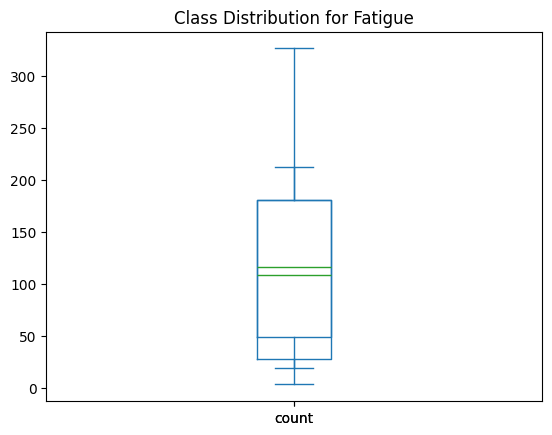

In [ ]:
# prompt: Use box plots and histograms to detect outliers. Remove extreme values based on
# statistical techniques.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


for col in ['Air Pollution', 'Fatigue']:
  df[col].value_counts().plot(kind='box', title=f'Class Distribution for {col}')



  # Remove outliers using IQR method
  df = remove_outliers_iqr(df, col)

df.shape


In [ ]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Snoring.1,Level
0,0,0,33,1,2,4,5.0,4,3.0,1,...,1,2.0,2.0,3,1.0,2,3,4,4,1
1,1,1,17,1,3,1,5.0,3,4.0,1,...,1,7.0,8.0,6,2.0,1,7,2,2,2
2,2,2,35,1,4,5,6.0,5,5.0,3,...,1,9.0,2.0,1,4.0,6,7,2,2,0
3,3,3,37,1,7,7,7.0,7,6.0,6,...,1,3.0,1.0,4,5.0,6,7,5,5,0
4,4,4,46,1,6,8,7.0,7,7.0,5,...,1,4.0,1.0,4,2.0,4,2,3,3,0


In [ ]:
#Standarize text
df['Level'] = df['Level'].replace({'low': 'Low', ' high ': 'High'})



             index   Patient Id          Age       Gender  Air Pollution  \
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.0000   
mean    499.500000   499.500000    37.174000     1.402000         3.8400   
std     288.819436   288.819436    12.005493     0.490547         2.0304   
min       0.000000     0.000000    14.000000     1.000000         1.0000   
25%     249.750000   249.750000    27.750000     1.000000         2.0000   
50%     499.500000   499.500000    36.000000     1.000000         3.0000   
75%     749.250000   749.250000    45.000000     2.000000         6.0000   
max     999.000000   999.000000    73.000000     2.000000         8.0000   

       Alcohol use  Dust Allergy  OccuPational Hazards  Genetic Risk  \
count  1000.000000   1000.000000           1000.000000   1000.000000   
mean      4.563000      5.167175              4.840000      4.578588   
std       2.620477      1.979647              2.107805      2.126524   
min       1.000000      1.0

<Axes: xlabel='Alcohol use', ylabel='Count'>

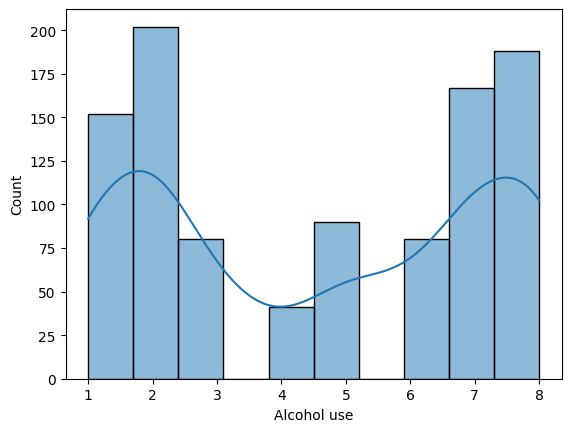

In [ ]:
print(df.describe())
sns.histplot(df['Alcohol use'], bins=10, kde=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = None
if df.skew().abs().max() > 1:  # If highly skewed,
    print("Applying Min-Max Normalization...")
    scaler = MinMaxScaler()
else:  # If normally distributed
    print("Applying Standardization...")
    scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("\nScaled Data (First 5 Rows):\n", df_scaled.head())

Applying Min-Max Normalization...

Scaled Data (First 5 Rows):
       index  Patient Id       Age  Gender  Air Pollution  Alcohol use  \
0  0.000000    0.000000  0.322034     0.0       0.142857     0.428571   
1  0.001001    0.001001  0.050847     0.0       0.285714     0.000000   
2  0.002002    0.002002  0.355932     0.0       0.428571     0.571429   
3  0.003003    0.003003  0.389831     0.0       0.857143     0.857143   
4  0.004004    0.004004  0.542373     0.0       0.714286     1.000000   

   Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
0      0.571429              0.428571      0.333333              0.142857   
1      0.571429              0.285714      0.500000              0.142857   
2      0.714286              0.571429      0.666667              0.428571   
3      0.857143              0.857143      0.833333              0.857143   
4      0.857143              0.857143      1.000000              0.714286   

   ...  Weight Loss  Shortness of 

-0.5772685504227858
-0.4023029673127494


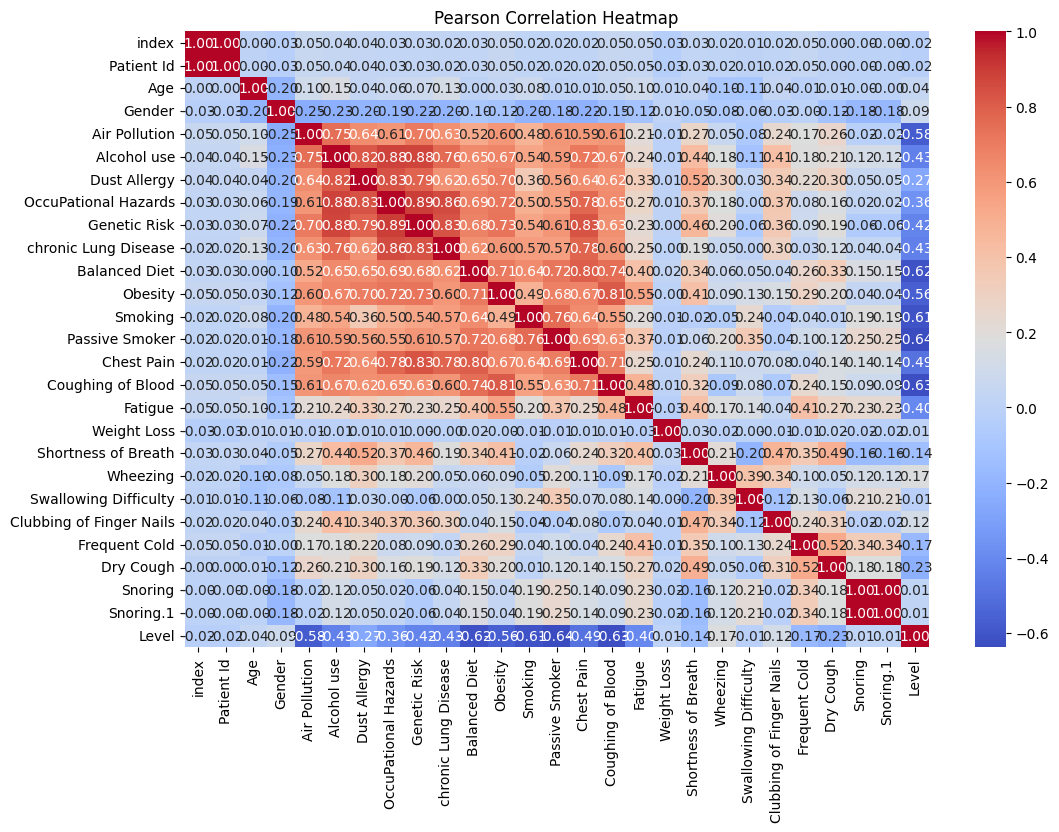

In [ ]:


corr_Air_Pollution=df['Air Pollution'].corr(df['Level'])
print(corr_Air_Pollution)

corr_Fatigue=df['Fatigue'].corr(df['Level'])
print(corr_Fatigue)

correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()


In [ ]:
#Most Relevant features



relevant_features = ['Air Pollution', 'Fatigue', 'Weight Loss', 'chronic Lung Disease']

print("Most relevant features:", relevant_features)
